
 #### HR Attrition
 
 We need to analyse and build a model for data about attrition. We need to predict whether a person is likely to leave the company or not. This is classification problem and we will need to check different classification algorithms for the same.
 
 Below are few attributes explained for the purpose of data analysis.
 
 Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [61]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data
df=pd.read_csv("HR Attrition.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

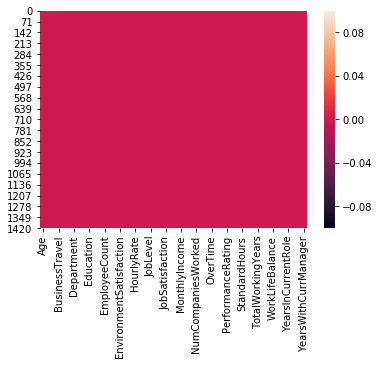

In [7]:
#Checking for missing values
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()
#There are no missing values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Univariate Analysis

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df['JobSatisfaction'].value_counts()
#Most of the employees have highest job satisfaction 

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [11]:
df['RelationshipSatisfaction'].value_counts()
#Most of the employees have good satisfaction rate at 3, followed by best relationship satisfaction at 4, followed by 2 and least at 1

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [12]:
df['StandardHours'].value_counts()
#There has been a standard working hours of 80 for all employees

80    1470
Name: StandardHours, dtype: int64

In [13]:
df['JobRole'].value_counts()
#The employees belong to 9 different roles

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

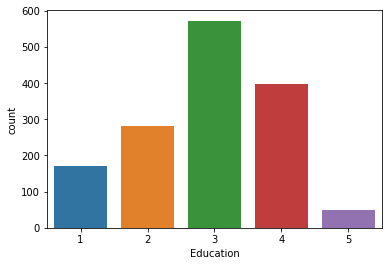

In [14]:
sns.countplot(df['Education'])
#Many no. of employees are bachelors, followed by Masters, College, Below College and Doctors

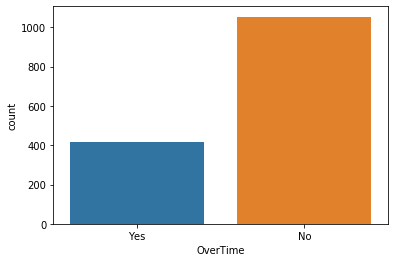

In [15]:
sns.countplot(df['OverTime'])
#Many employees have not worked over time

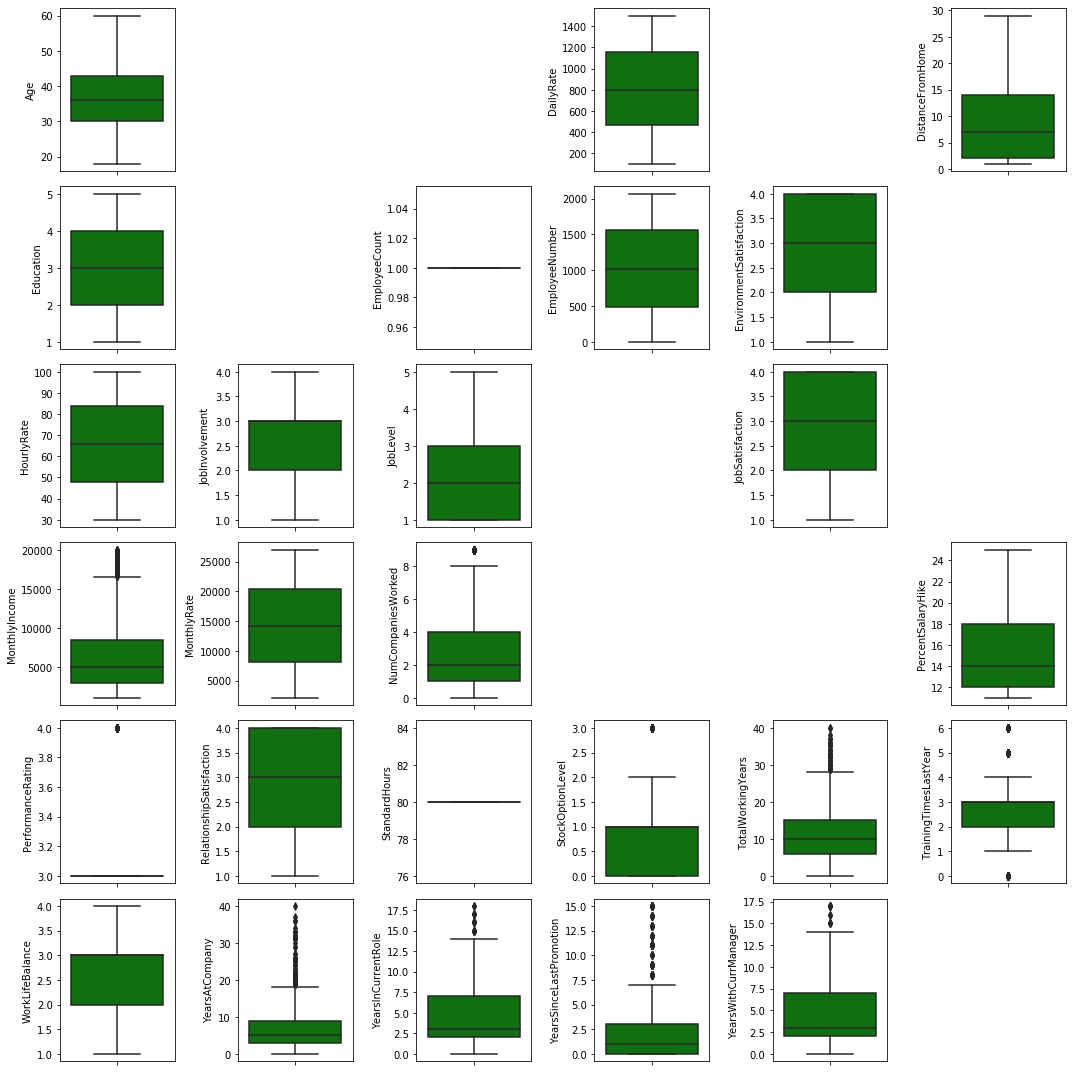

In [16]:
col_list=df.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if df[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(df[col_list[i]], color='green',orient='v')
        plt.tight_layout()

Only columns like Years at Company, Years in Current Role, Years since last promotion and years with current manager have few outliers

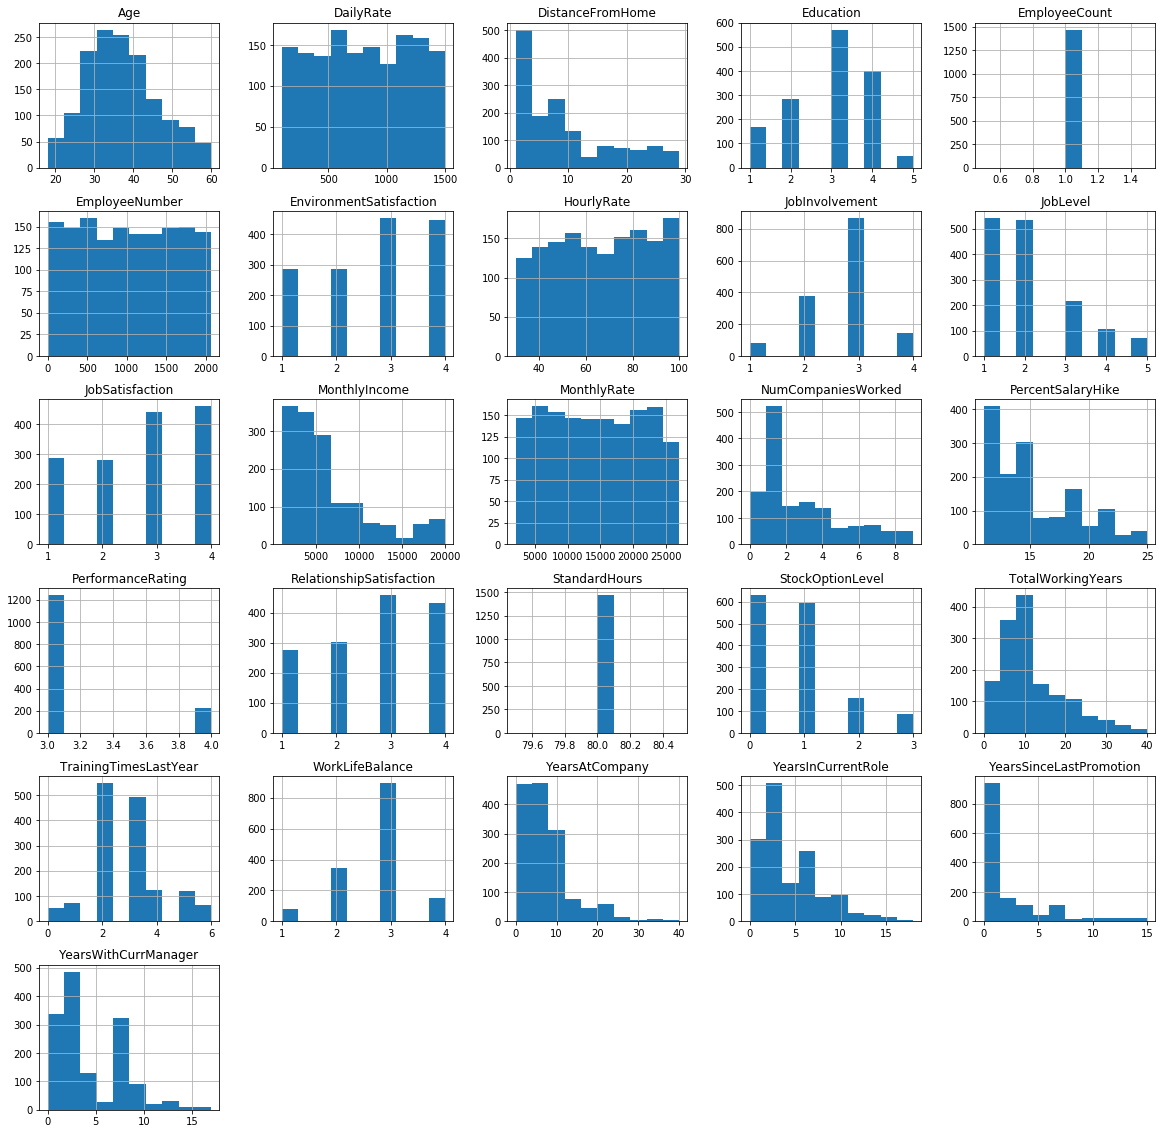

In [17]:
df.hist(figsize=(20,20))
plt.show()

Observations:

1. There are many columns which are right skewed. We need  to treat the same later.
2. Employee count and standard hours are common for all the employees.


### Statistical Analysis

In [18]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


1. The average age of employees is 36.
2. The mean distance from home is 7 km.
3. On an average employees have spent 3 years with current manager
4. On an average employees stay 5 years in a company.
5. On an average total working years is 10.


#### Bivariate Analysis

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
df.groupby('Attrition').mean()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Observation
1. People who are younger around 33-34 are leaving jobs more.
2. The distance from home for those who have left jobs is more than 10 km where as for those who have not left is 8.9 kms.
3. The average hourly rate for those have not left jobs is more than those who left jobs.
4. The people in comparitively lower level jobs are likely to leave the job.
5. People with less monthly income comparitively are more likely to leave the job.
6. People who have remained in the job have got more hike. 
7. People who have remained in the job have got more relationship satisfaction than who left the job.
8. People having more working years experience are more likely to remain in the job.
9. Surprisingly people who have remained in the job have got promotion average before 2.23 years than those left have got it 1.95 years.
10. People who are in the current role for longer are less likely to leave the company.
11. People who are remaining in the company have got better worklife balance than those who have left.
12. Those who have remained in the company have got more training than those who left.
13. Those who have remained have got more stock option level than those who left.

In [21]:
df.corr()
#Age and JobLevel, Job and Monthly Income are positively correlated.
#Years in the Company, years under the current manager, years in current role are all positively correlated.
#total working years, job level and monthly income are all positively correlated

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


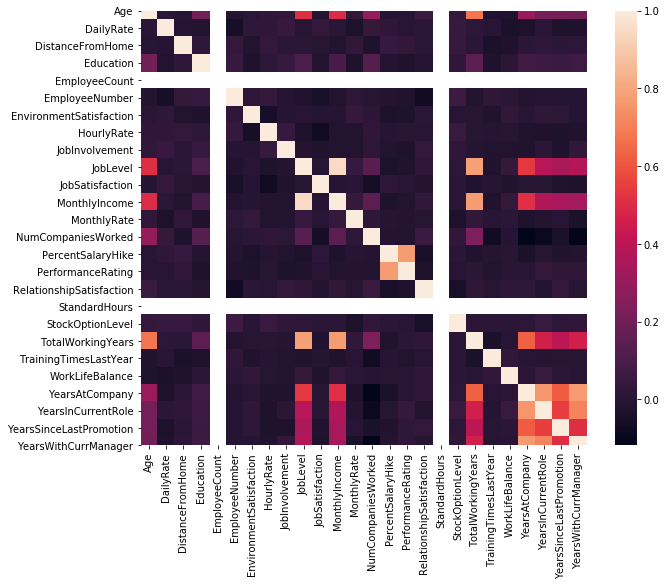

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),color='Blue')

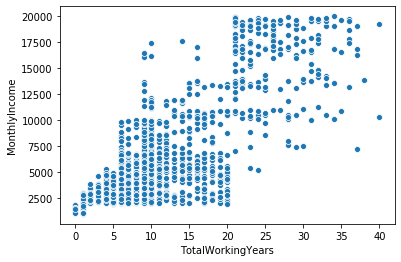

In [23]:
sns.scatterplot(x='TotalWorkingYears',y='MonthlyIncome',data=df)
#Total working years and monthly income show positive correlation

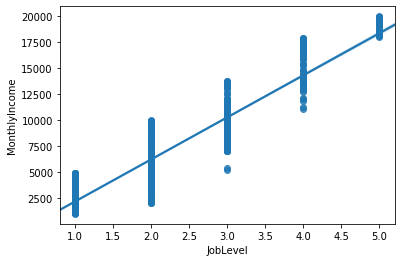

In [24]:
sns.regplot(x='JobLevel',y='MonthlyIncome',data=df)
#Job level and monthly income show positive correlation

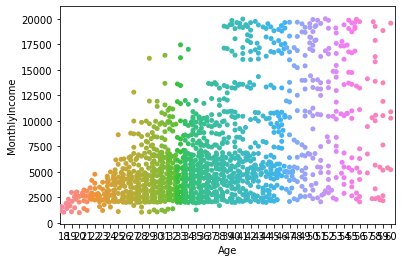

In [25]:
sns.swarmplot(x='Age',y='MonthlyIncome',data=df)
# age and monthly income show a positive correlation

In [26]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
#gender wise analysis
df.groupby('Gender').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,37.329932,808.273810,9.210884,2.933673,1.0,1008.239796,2.721088,65.903061,2.714286,2.117347,2.683673,6686.566327,14674.600340,2.812925,15.197279,3.159864,2.681973,80.0,0.780612,11.726190,2.860544,2.763605,7.231293,4.413265,2.294218,4.256803
Male,36.653061,798.626984,9.180272,2.899093,1.0,1035.948980,2.722222,65.883220,2.740363,2.028345,2.758503,6380.507937,14072.105442,2.613379,15.217687,3.149660,2.732426,80.0,0.802721,10.981859,2.758503,2.759637,6.859410,4.106576,2.116780,4.034014


Observations:-
1. Female earn slightly more avg daily rate, hourly rate than men.
2. Women are more educated than men. 
3. Men have more Jobinvolvement, Job satisfaction than women. 
4. Average monthly income and average monthly rate of women is higher than that of men.
5. Women have worked in more companies than men.
6. Even though women have got more performance rating than men, they have got lesser percentage salary hike than men.
7. Men have sligher higher stock option level.
8. Women have stayed more in the company than men.
9. Women have received more training last year and have slightly better work life balance than men.

In [28]:
df.groupby('BusinessTravel').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.620000,816.960000,9.760000,2.926667,1.0,1064.626667,2.733333,64.866667,2.633333,2.040000,2.793333,6261.946667,14635.600000,2.713333,15.606667,3.173333,2.780000,80.0,0.866667,10.593333,2.720000,2.773333,7.146667,4.353333,2.386667,4.300000
Travel_Frequently,36.454874,792.628159,9.277978,2.895307,1.0,1014.898917,2.693141,65.097473,2.736462,2.014440,2.790614,6193.725632,14318.187726,2.487365,15.158845,3.166065,2.776173,80.0,0.765343,11.083032,2.815884,2.776173,7.173285,4.241877,2.342960,4.216606
Travel_Rarely,37.092042,803.022052,9.088207,2.915628,1.0,1021.793864,2.727709,66.249281,2.742090,2.080537,2.702780,6619.707574,14265.372963,2.744966,15.165868,3.147651,2.685523,80.0,0.790988,11.430489,2.806328,2.755513,6.944391,4.208054,2.117929,4.072867


Observations:
1. The employees who travel frequently are in little less Job level and have lesser monthly income.
2. They have a better relationship satisfaction and enjoy good work life balance when compared to others.
3. They have also stayed more in company than other groups.


In [29]:
df.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,2.603175,6654.507937,13492.984127,2.936508,14.761905,3.142857,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,2.751121,6959.172646,14489.793722,2.571749,15.096413,3.136771,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


1. Daily rate earned by Humar Resources(HR) is lesser than Reserach & Development(R&D) and Sales.
2. Education in HR is highest followed by Sales and R&D.
3. Job involvement is highest in HR, however job satisfaction is highest in Sales.
4. Monthly income average is more in sales followed by HR and then R&D.
5. HR enjoys good work life balance followed by sales and R&D.
6. Sales dept tend to stay more in company followed by HR and then R&D.

In [30]:
df.groupby('EducationField').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EducationField,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.037037,675.259259,9.037037,3.111111,1.0,1180.370370,2.666667,60.888889,2.740741,2.148148,2.555556,7241.148148,14810.740741,3.259259,14.777778,3.111111,3.037037,80.0,0.925926,11.592593,2.444444,2.740741,6.777778,3.555556,1.629630,3.370370
Life Sciences,37.107261,804.425743,8.955446,2.929043,1.0,1024.427393,2.689769,66.831683,2.732673,2.052805,2.797030,6463.288779,14530.132013,2.674917,15.254125,3.158416,2.686469,80.0,0.775578,11.245875,2.739274,2.727723,6.993399,4.308581,2.178218,4.138614
Marketing,37.924528,727.836478,10.106918,3.125786,1.0,999.830189,2.723270,66.150943,2.691824,2.358491,2.654088,7348.584906,14076.943396,2.559748,14.918239,3.132075,2.691824,80.0,0.849057,11.855346,2.691824,2.798742,7.559748,4.490566,2.245283,4.465409
Medical,36.838362,822.799569,9.353448,2.803879,1.0,1017.165948,2.687500,65.280172,2.747845,2.040948,2.691810,6510.036638,14295.056034,2.784483,15.366379,3.161638,2.760776,80.0,0.836207,11.564655,2.933190,2.762931,7.105603,4.088362,2.295259,4.062500
Other,35.365854,796.024390,8.926829,3.073171,1.0,1050.695122,3.012195,62.365854,2.695122,1.987805,2.743902,6071.548780,13270.780488,2.560976,15.500000,3.170732,2.621951,80.0,0.646341,10.353659,2.756098,2.853659,6.243902,3.975610,1.658537,3.951220
Technical Degree,36.121212,842.128788,8.810606,2.825758,1.0,1036.242424,2.818182,66.621212,2.719697,1.871212,2.659091,5758.303030,14210.363636,2.583333,14.712121,3.128788,2.674242,80.0,0.727273,10.250000,2.833333,2.810606,6.590909,4.340909,2.227273,4.113636


Observations:
1. Technical Degree employees earn more Daily rate followed by Medical.
2. Job satisfaction is highest amongst life sciences and others.
3. Marketing have more monthly income followed by Human resources.
4. Marketing department has less attrition when compared to others.

In [31]:
df.groupby('JobRole').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,39.809160,854.251908,9.786260,2.992366,1.0,1074.786260,2.770992,66.839695,2.732824,2.473282,2.786260,7528.763359,14400.198473,2.908397,15.450382,3.152672,2.694656,80.0,0.832061,14.068702,2.748092,2.702290,8.374046,4.862595,2.969466,4.572519
Human Resources,35.500000,757.923077,8.173077,2.884615,1.0,1236.326923,2.596154,64.173077,2.711538,1.480769,2.557692,4235.750000,13292.403846,2.961538,14.807692,3.134615,2.961538,80.0,0.750000,8.173077,2.557692,2.923077,5.326923,3.134615,1.269231,3.173077
Laboratory Technician,34.096525,796.617761,9.409266,2.772201,1.0,999.200772,2.718147,66.683398,2.694981,1.239382,2.691120,3237.169884,14066.061776,2.579151,15.046332,3.162162,2.687259,80.0,0.818533,7.656371,2.949807,2.718147,5.019305,3.200772,1.420849,3.297297
Manager,46.764706,782.950980,8.029412,3.019608,1.0,947.598039,2.764706,66.833333,2.774510,4.303922,2.705882,17181.676471,15139.578431,3.078431,15.137255,3.196078,2.813725,80.0,0.745098,24.549020,2.813725,2.774510,14.431373,6.450980,4.833333,6.274510
Manufacturing Director,38.296552,796.020690,9.482759,2.896552,1.0,998.758621,2.917241,65.006897,2.682759,2.448276,2.682759,7295.137931,14478.965517,2.765517,15.593103,3.186207,2.724138,80.0,0.813793,12.786207,2.744828,2.765517,7.600000,4.972414,2.117241,4.944828
Research Director,44.000000,802.450000,8.437500,3.125000,1.0,989.787500,2.500000,63.762500,2.775000,3.975000,2.700000,16033.550000,15080.550000,3.712500,14.950000,3.100000,2.687500,80.0,0.850000,21.400000,2.775000,2.862500,10.937500,6.287500,3.187500,6.075000
Research Scientist,34.236301,800.359589,9.013699,2.914384,1.0,1003.486301,2.726027,66.708904,2.797945,1.202055,2.773973,3239.972603,13927.113014,2.472603,15.448630,3.167808,2.705479,80.0,0.773973,7.715753,2.664384,2.678082,5.113014,3.273973,1.506849,3.208904
Sales Executive,36.889571,802.098160,9.659509,3.015337,1.0,1051.092025,2.671779,65.438650,2.714724,2.328221,2.754601,6924.279141,14471.110429,2.720859,14.889571,3.125767,2.702454,80.0,0.819018,11.101227,2.831288,2.803681,7.496933,4.855828,2.484663,4.677914
Sales Representative,30.361446,811.349398,8.662651,2.530120,1.0,1040.253012,2.734940,64.337349,2.650602,1.084337,2.734940,2626.000000,14278.204819,1.626506,15.674699,3.144578,2.602410,80.0,0.626506,4.674699,3.012048,2.891566,2.915663,2.012048,1.060241,1.662651


Observations:-
1. The average age of Sales Representative is the least at 30 and Manager is at 46 and Research Director is at 44.
2. Healthcare representative, Laboratory technician, Manager and research scientist are getting highest hourly rate.
3. Percentage salary hike is almost same for all job categories between 14%-15%.
4. People in jobs Research Director and Manager have been in the company for more no of years over 10 years.
5. Research scientist and Manager have more Monthly Income when compared to others.


In [32]:
df.groupby('MaritalStatus').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,,,,,,
Divorced,37.489297,830.449541,9.110092,2.908257,1.0,996.568807,2.755352,65.657492,2.752294,2.140673,2.697248,6786.287462,14310.085627,2.883792,15.048930,3.146789,2.724771,80.0,1.504587,11.807339,2.819572,2.749235,7.302752,4.35474,2.155963,4.217125
Married,37.757801,820.059435,9.459138,2.910847,1.0,1060.187221,2.695394,66.696880,2.751857,2.124814,2.716196,6793.671620,14044.502229,2.649331,15.292719,3.157504,2.661218,80.0,1.002972,11.732541,2.757801,2.756315,7.307578,4.48737,2.377415,4.251114
Single,35.336170,757.865957,8.868085,2.919149,1.0,993.974468,2.736170,64.900000,2.682979,1.923404,2.768085,5889.472340,14699.817021,2.623404,15.202128,3.153191,2.776596,80.0,0.000000,10.263830,2.844681,2.776596,6.374468,3.77234,1.938298,3.874468


Observations
1. The mean age of Single is less than divorced and married.
2. Single tend to live little close to workplace than divorced or married.
3. Singles' involvement in job is little lesser than divorced or married.
4. Divorced have higher Joblevel followed by married and singles.
5. Average monthly income is more for married followed by divorced and singles. Age and Job level might be influence factor here.
6. Divorced and Singles have more relationship satisfaction than married people.
7. Divorced have highest stock option level followed by married people.
8. Singles have more worklife balance followed by married and then by divorced.
9. Divorced and Married have stayed more in the company in no. of years than singles.

### Preprocessing the data

##### Removing the columns which are not required. 
The columns like 'Over18', 'StandardHours', 'EmployeeCount' have only value and column 'EmployeeNumber' has each number assigned to every employee. So all these columns can be dropped.


In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [34]:
df=df.drop(['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


### Using LabelEncoder 
We need to convert the categorical variables into the numerical variables and hence we can use LabelEncoder.

In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [36]:
for i in df.columns:
    if df[i].dtype =='O':
        df[i]=pd.DataFrame(lb.fit_transform(df[i]))

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


#### Removing the outliers from the data

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The shape before removing the zscore", df.shape)
df=df[(z<3).all(axis=1)]
print("The shape after removing the zscore", df.shape)

The shape before removing the zscore (1470, 31)
The shape after removing the zscore (1387, 31)


### Separating the input and the output variable

In [39]:
x=df.drop(['Attrition'],axis=1)
y=pd.DataFrame(df['Attrition'])
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [40]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


#### Skewness of the data

In [41]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

In [42]:
#using log function to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [43]:
#Checking the skewness again
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
Y

In [44]:
# Using sqrt function to reduce the skewness further
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [45]:
#Checking the skewness again
df.skew()
#This has reduced skewness to some extent.

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

### Scaling the data

In [46]:
#using the minmaxscaler to scale the input variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.547619,1.0,0.716332,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,0.666667,0.36907,0.875,1.000000,1.0,0.596990,0.698016,0.954243,1.0,0.000000,0.0,0.000000,0.0,0.618005,0.000000,0.000000,0.597254,0.580482,0.000000,0.661642
1,0.738095,0.5,0.126791,0.5,0.555410,0.00,0.2,0.666667,1.0,0.442857,0.333333,0.36907,0.750,0.333333,0.5,0.544875,0.915991,0.301030,0.0,0.896477,1.0,1.000000,0.5,0.674447,0.712414,0.666667,0.735980,0.750000,0.528150,0.767874
2,0.452381,1.0,0.910458,0.5,0.149726,0.25,0.8,1.000000,1.0,0.885714,0.333333,0.00000,0.250,0.666667,1.0,0.243948,0.012007,0.845098,1.0,0.372072,0.0,0.333333,0.0,0.584877,0.712414,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.924069,0.5,0.255958,0.75,0.2,1.000000,0.0,0.371429,0.666667,0.00000,0.750,0.666667,0.5,0.354747,0.845796,0.301030,1.0,0.000000,0.0,0.666667,0.0,0.618005,0.712414,0.666667,0.674389,0.750000,0.746918,0.000000
4,0.214286,1.0,0.350287,0.5,0.149726,0.00,0.6,0.000000,1.0,0.142857,0.666667,0.00000,0.250,0.333333,0.5,0.413652,0.583688,1.000000,0.0,0.103523,0.0,1.000000,0.5,0.547319,0.712414,0.666667,0.337195,0.396241,0.664917,0.405684


#### selecting the best random state for splitting the data

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [48]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [49]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.8525179856115108
The accuracy score at r_state 43 is 0.8776978417266187
The accuracy score at r_state 44 is 0.8489208633093526
The accuracy score at r_state 45 is 0.89568345323741
The accuracy score at r_state 46 is 0.8705035971223022
The accuracy score at r_state 47 is 0.8741007194244604
The accuracy score at r_state 48 is 0.8884892086330936
The accuracy score at r_state 49 is 0.8812949640287769
The accuracy score at r_state 50 is 0.8776978417266187
The accuracy score at r_state 51 is 0.8812949640287769
The accuracy score at r_state 52 is 0.8525179856115108
The accuracy score at r_state 53 is 0.8489208633093526
The accuracy score at r_state 54 is 0.8776978417266187
The accuracy score at r_state 55 is 0.9028776978417267
The accuracy score at r_state 56 is 0.8884892086330936
The accuracy score at r_state 57 is 0.8848920863309353
The accuracy score at r_state 58 is 0.8705035971223022
The accuracy score at r_state 59 is 0.8453237410071942
The accuracy

0.9028776978417267

In [50]:
#Lets check the cross val score for the same
cvscore=cross_val_score(lg,x,y,cv=5).mean()
print(cvscore)

0.8731235510728131


In [51]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [54]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [55]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()


In [56]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.9028776978417267

The cross val score is 0.8731235510728131

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       235
           1       0.90      0.42      0.57        43

    accuracy                           0.90       278
   macro avg       0.90      0.71      0.76       278
weighted avg       0.90      0.90      0.89       278


[[233   2]
 [ 25  18]]

roc_auc_score 0.7050470064324592


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
      

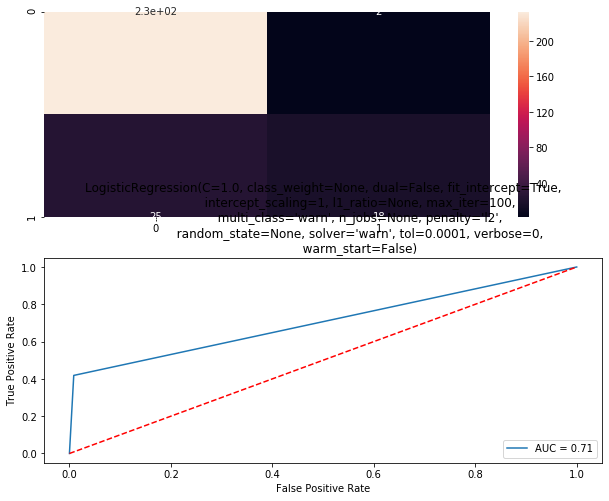

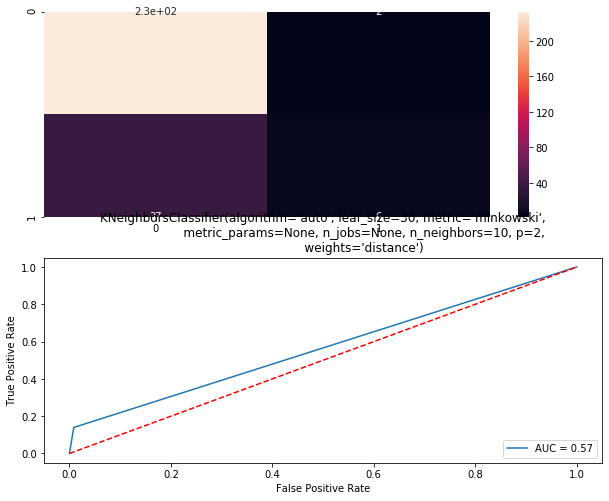

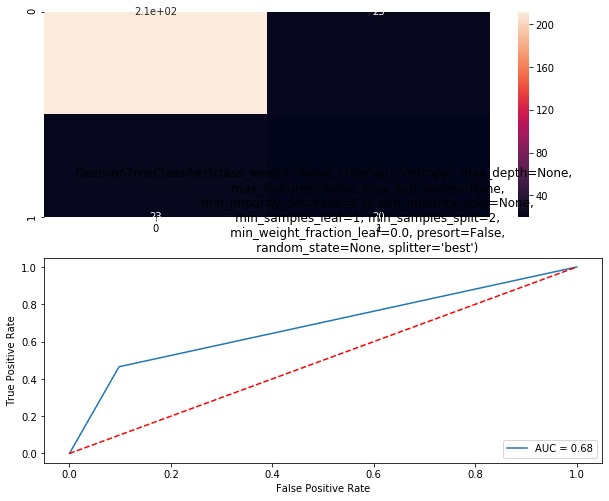

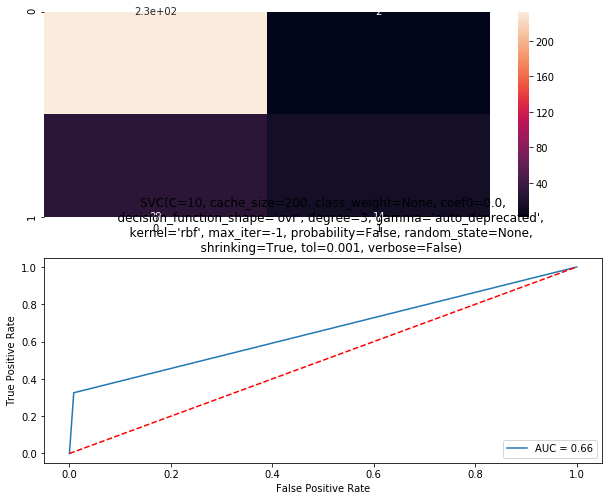

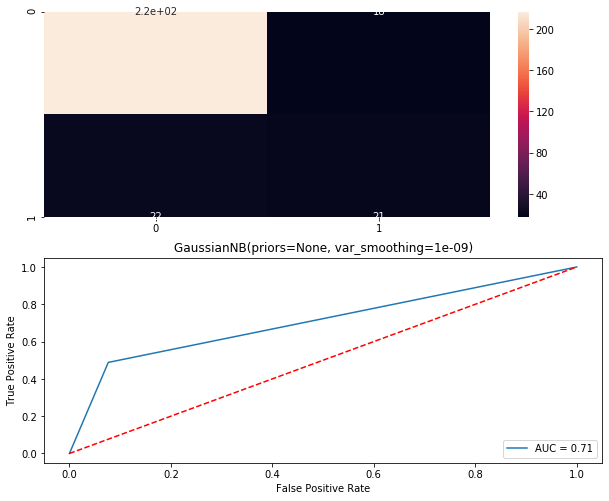

In [57]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='rbf'),gb]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [58]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.902878,0.873124,0.705047
1,<class 'sklearn.neighbors.classification.KNeig...,0.859712,0.850780,0.565512
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.834532,0.777261,0.683622
3,<class 'sklearn.svm.classes.SVC'>,0.888489,0.877448,0.658535
4,<class 'sklearn.naive_bayes.GaussianNB'>,0.856115,0.816899,0.705888


From the above model comparison, we can conclude that LogisticRegression is performing well. Hence let us finalise the model.

In [63]:
#Let us finalise the Logisticregression
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
acc_score=accuracy_score(test_y,pred)
crossval=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
print("The accuracy score is", acc_score)
print("The cross validation score is", crossval)
pd.DataFrame(pred).to_csv("Project4_HR Attrition_prediction.csv")

The accuracy score is 0.9028776978417267
The cross validation score is 0.8731235510728131


In [62]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(lg,'HR_attrition.pkl')

['HR_attrition.pkl']